# WeatherPy

In [39]:
%matplotlib inline

In [62]:
#Dependencies
import requests
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from citipy import citipy
import sys
import os
import time
sys.path.append("..")


# Import API key
from api_keys import weather_api_key

## Generate Cities List

The aim of this code was to create as much of an even distribution of cities across the globe as possible. The cities datalist is divided into 4 quadrants taking random latitudes and longitutes from the Northern, Southern, Eastern and Western hemispheres. Lists of 150 cities from each quadrant were generated separately. This was done as 90% of the worlds population and land mass exist in the Northern hemisphere so the likelyhood of generating unique Southern hemisphere cities in a single list using the citipy library is reduced.

In [2]:
#geographical coordinates divided into 4 sections to obtain most equal spread of cities, to make the citipy library work faster the latitudes have been capped at the northern and southern most cities in the world to prevent getting too much ocean or uninhabitated land 
lats = [(0,79),(0,79), (-54,0), (-54,0)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

In [3]:
#function to make lists of unique city/country combinations from above coordinates evenly split across each section
#np.random.uniform is used to ensure selection follows uniform distribution not normal distribution
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])  
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = citipy.nearest_city(lat, lon).country_code
        listname.append((city, country))
        listname = sorted(list(set(listname)))
    return(listname)





In [4]:
#create 4 lists of cities using makelists function, to ensure as even a spread across sections as possible
cities = []
for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities.extend(listn)

    


In [5]:
#splits cities into sets of 50 to ensure max of 60 API calls per second does not interrupt code
citysets = [cities[i:i + 50] for i in range(0, len(cities), 50)]


## Perform API Calls
This requires user to provide own API key in api_keys.py

In [75]:
#API calls on each dictionary
print("Begining of Data Retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for oneset in citysets:
    start = time.perf_counter()
    for city in oneset:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city[0]},{city[1]}&units=imperial&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city[0]}")
            cities2.append(city[0])
            
          
            i +=1
    end = time.perf_counter()
    time.sleep(60-(end-start))
    j +=1
    
    
print("-----------------\nData Retrieval Complete \n-----------------")
#creates dictionary of weather data    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp ($^o$F)" : maxtemp, 
    "Humidity (%)" : humidity, 
    "Cloudiness (%)" : cloudiness, 
    "Wind Speed (mph)": wind, 
    "Country": country,
    "Date" : date
}


Begining of Data Retrieval
-----------------
City not found. Skipping...
Processing Record 1 of Set 1 | agde
City not found. Skipping...
Processing Record 2 of Set 1 | alexandria
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | arlit
Processing Record 5 of Set 1 | askiz
Processing Record 6 of Set 1 | at-bashi
Processing Record 7 of Set 1 | awjilah
Processing Record 8 of Set 1 | balabac
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | batagay-alyta
Processing Record 10 of Set 1 | baykit
Processing Record 11 of Set 1 | berdigestyakh
City not found. Skipping...
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | bet shemesh
Processing Record 15 of Set 1 | bilibino
City not found. Skipping...
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | cagliliog
Processing Record 19 of Set 1 | can
Processing Recor

Processing Record 180 of Set 5 | ixchiguan
Processing Record 181 of Set 5 | ixtapa
Processing Record 182 of Set 5 | johnstown
Processing Record 183 of Set 5 | kahului
Processing Record 184 of Set 5 | kailua
Processing Record 185 of Set 5 | kapaa
Processing Record 186 of Set 5 | kelvington
Processing Record 187 of Set 5 | ketchikan
Processing Record 188 of Set 5 | kita
Processing Record 189 of Set 5 | kitimat
Processing Record 190 of Set 5 | klaksvik
Processing Record 191 of Set 5 | kodiak
Processing Record 192 of Set 5 | la palma
Processing Record 193 of Set 5 | la ronge
Processing Record 194 of Set 5 | lagoa
Processing Record 195 of Set 5 | langholm
Processing Record 196 of Set 5 | liverpool
Processing Record 197 of Set 5 | lompoc
Processing Record 198 of Set 5 | los llanos de aridane
Processing Record 199 of Set 5 | makakilo city
Processing Record 200 of Set 5 | marienburg
Processing Record 201 of Set 5 | marsh harbour
Processing Record 202 of Set 5 | mayo
Processing Record 203 of Se

Processing Record 366 of Set 9 | plettenberg bay
Processing Record 367 of Set 9 | port alfred
Processing Record 368 of Set 9 | port augusta
Processing Record 369 of Set 9 | port elizabeth
Processing Record 370 of Set 9 | port lincoln
Processing Record 371 of Set 9 | port macquarie
Processing Record 372 of Set 9 | port-gentil
Processing Record 373 of Set 9 | pouebo
Processing Record 374 of Set 9 | poum
Processing Record 375 of Set 9 | praya
Processing Record 376 of Set 9 | pringsewu
Processing Record 377 of Set 9 | quatre cocos
Processing Record 378 of Set 9 | rehoboth
Processing Record 379 of Set 9 | richards bay
Processing Record 380 of Set 9 | roma
City not found. Skipping...
City not found. Skipping...
Processing Record 381 of Set 9 | russell
Processing Record 382 of Set 9 | saint-philippe
Processing Record 383 of Set 9 | saldanha
Processing Record 384 of Set 9 | samarai
Processing Record 385 of Set 9 | senanga
Processing Record 386 of Set 9 | sola
Processing Record 387 of Set 9 | s

Processing Record 540 of Set 12 | villa carlos paz
Processing Record 541 of Set 12 | zamora
-----------------
Data Retrieval Complete 
-----------------


## Converts API Data to DataFrame
   


In [76]:
#converts weather dictionary to dataframe removing duplicated city and country pairs
df1 = pd.DataFrame(citiesdata)
initial = len(df1)
df1.drop_duplicates(subset=['City','Country'], keep= 'first', inplace=True)
final = len(df1)

print(f"{initial - final} duplicate city/country pairs were removed")


9 duplicate city/country pairs were removed


In [77]:
#display data frame head
df1.head()

,City,Lat,Lng,Max Temp ($^o$F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,agde,43.3108,3.4758,66.20,45,0,8.05,FR,1619445434
1,alexandria,31.2156,29.9553,69.80,60,20,10.36,EG,1619445435
2,anadyr,64.7500,177.4833,19.40,93,100,6.71,RU,1619445435
3,arlit,18.7369,7.3853,108.39,5,99,7.94,NE,1619445435
4,askiz,53.1319,90.5264,44.71,54,100,3.80,RU,1619445435


In [78]:
#calculate and display summary statistic
df1.describe().style.format({'Lat':'{:.2f}','Lng':'{:.2f}','Max Temp ($^o$F)':'{:.2f}','Humidity (%)':'{:.2f}','Cloudiness (%)':'{:.2f}', 'Wind Speed (mph)':'{:.2f}' ,'Date':"{:.0f}"})


,Lat,Lng,Max Temp ($^o$F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,532.00,532.00,532.00,532.00,532.00,532.00,532
mean,9.39,4.74,65.17,68.33,54.60,7.48,1619445758
std,33.63,89.85,20.30,22.86,37.73,4.64,204
min,-54.80,-175.20,-4.00,5.00,0.00,0.34,1619445334
25%,-17.80,-66.58,51.09,57.00,19.75,3.80,1619445594
50%,-0.30,-1.38,69.80,72.00,65.00,6.79,1619445739
75%,40.29,72.65,80.60,86.00,90.00,10.36,1619445921
max,77.48,179.32,109.04,100.00,100.00,25.32,1619446104


 ## Inspects and removes data if humidity is over 100%

In [79]:
#cleans data if humidity is greater than 100%
if df1["Humidity (%)"].max() > 100:
    over100 = (df1[df1["Humidity (%)"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

#save to csv    
clean_city_data.to_csv("cityweatherdata.csv", encoding = "utf-8", index=False)

## Plotting Data

In [80]:
#gets date of data
date = datetime.fromtimestamp(clean_city_data["Date"].max()).strftime("%d/%m/%y")
date

'26/04/21'

In [110]:
#function to make scatter plot
def makescatter(df, x, y, date):
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot()
    ax.scatter(df[x], df[y])
    ax.set_title(y + " vs City Latitudes as at "+date, pad=15)
    ax.set_ylabel(y)
    ax.set_xlabel("Latitude")
    ax.grid(True)
    path = os.path.join("..",f"output/{x}{y}.png")
    fig.savefig(path)
    return 


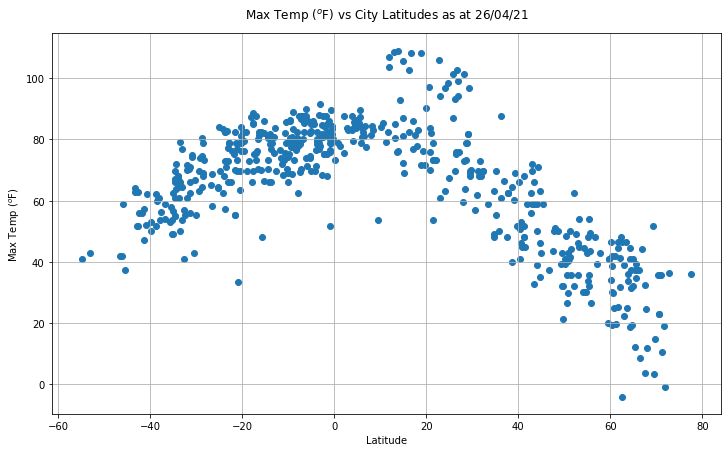

In [111]:
#lat vs temp
makescatter(clean_city_data,"Lat",'Max Temp ($^o$F)',date)

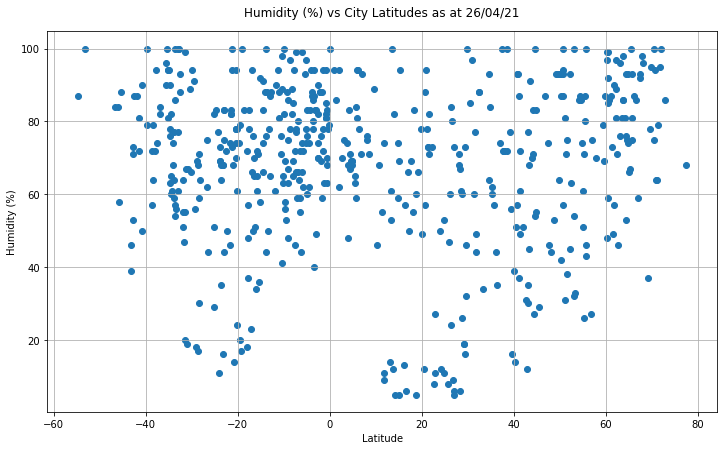

In [112]:
#lat vs humidity
makescatter(clean_city_data,"Lat",'Humidity (%)',date)


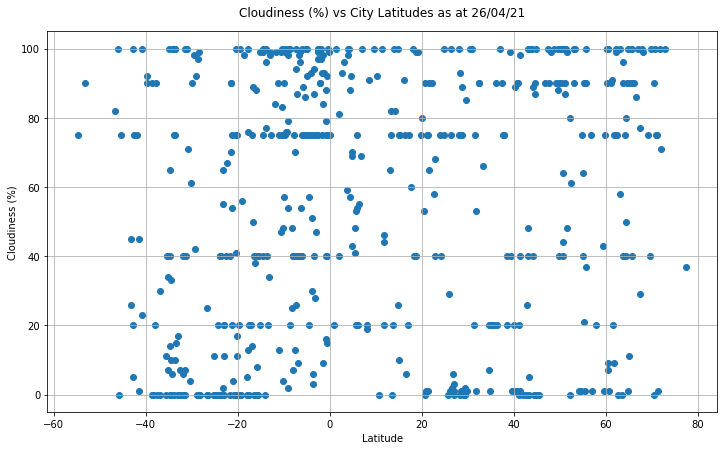

In [113]:
#lat vs clouds
makescatter(clean_city_data,"Lat",'Cloudiness (%)',date)

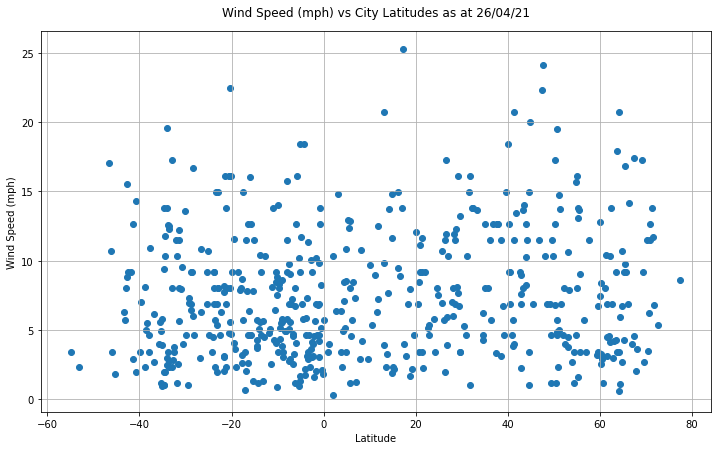

In [114]:
#lat vs wind
makescatter(clean_city_data,"Lat",'Wind Speed (mph)',date)

## Linear Regressions

In [95]:
#divides dataframes into northern and southern hemisphere cities
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [96]:
#shows even distribution of cities in each hemisphere
print(f"Number of cities in Northern Hemisphere dataset: {len(northerncities)}\nNumber of cities in Southern Hemisphere dataset: {len(southerncities)}")

Number of cities in Northern Hemisphere dataset: 265
Number of cities in Southern Hemisphere dataset: 267


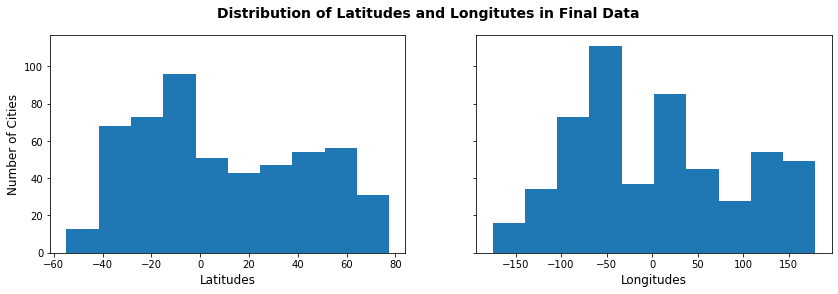

In [97]:
#due to location of land masses the actual lat and long distribution of sampled cities will never be uniform
fig, axs = plt.subplots(1,2, sharey = True, figsize =(14,4))
fig.suptitle("Distribution of Latitudes and Longitutes in Final Data", fontsize=14, fontweight="bold")
axs[0].hist(clean_city_data['Lat'])
axs[0].set_xlabel("Latitudes",fontsize=12)
axs[0].set_ylabel("Number of Cities",fontsize=12)
axs[1].hist(clean_city_data['Lng'])
axs[1].set_xlabel("Longitudes",fontsize=12)

plt.show()


In [98]:
#function to make regressions
def makeregression(df, x, y, title):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[x], df[y])
    regression = df[x] * slope + intercept
    line = f"y = {slope:.2f}x + {intercept:.2f}\nr = {rvalue:.2f}"
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot()
    ax.scatter(df[x], df[y])
    ax.plot(df[x], regression, "r-")
    fig.text(0.15,0.2,line,fontsize=12,color="red")
    ax.set_title(y + " in "+title, pad=15)
    ax.set_ylabel(y)
    ax.set_xlabel("Latitude")
    ax.grid(True)
    path = os.path.join("..",f"output/{title}{y}.png")
    fig.savefig(path)
    return 



    

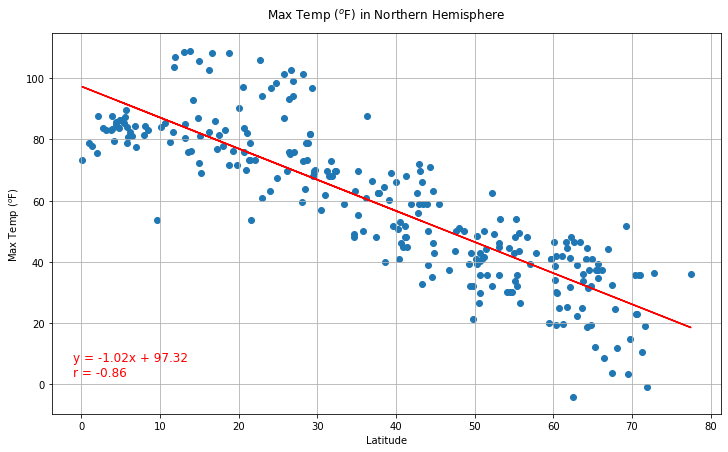

In [99]:
#northern cities max temp vs lat
makeregression(northerncities,'Lat', 'Max Temp ($^o$F)','Northern Hemisphere')

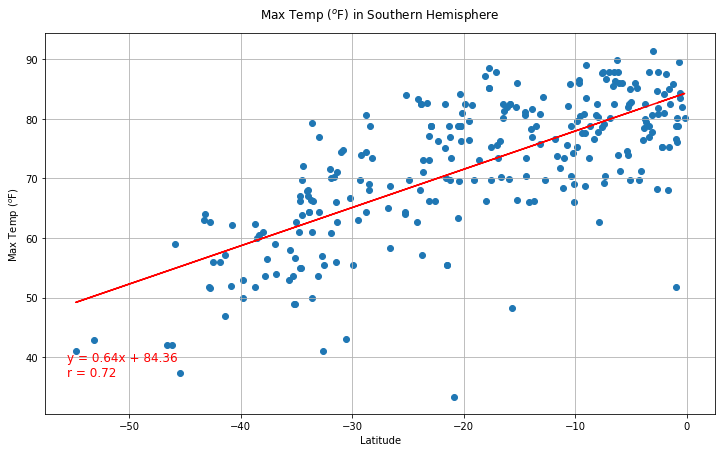

In [100]:
#southern cities max temp vs lat
makeregression(southerncities,'Lat', 'Max Temp ($^o$F)','Southern Hemisphere')

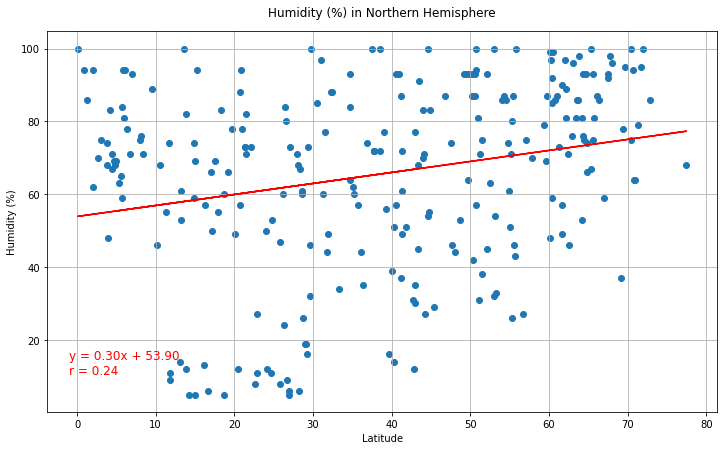

In [101]:
#northern cities humidity vs lat
makeregression(northerncities,'Lat', 'Humidity (%)','Northern Hemisphere')

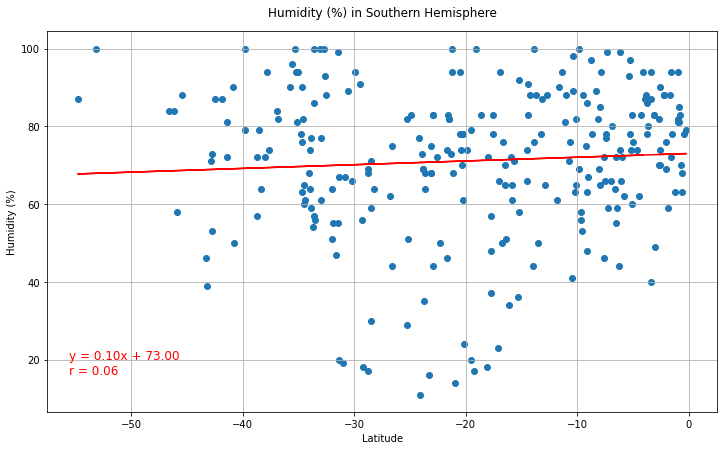

In [103]:
#southern cities humidity vs lat
makeregression(southerncities,'Lat', 'Humidity (%)','Southern Hemisphere')

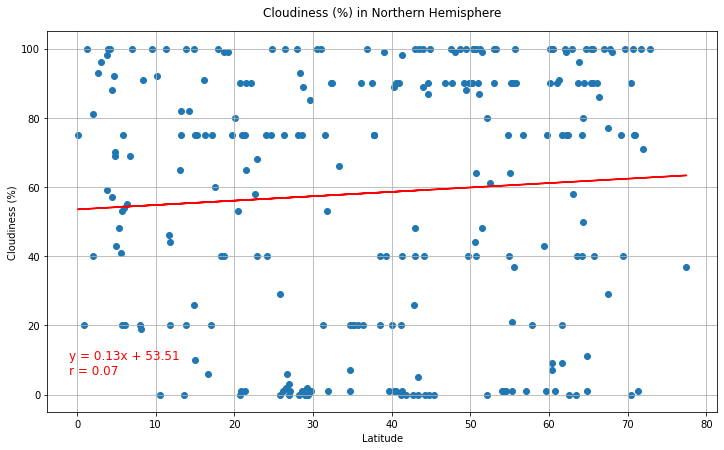

In [104]:
#northern cities cloud vs lat
makeregression(northerncities,'Lat', 'Cloudiness (%)','Northern Hemisphere')

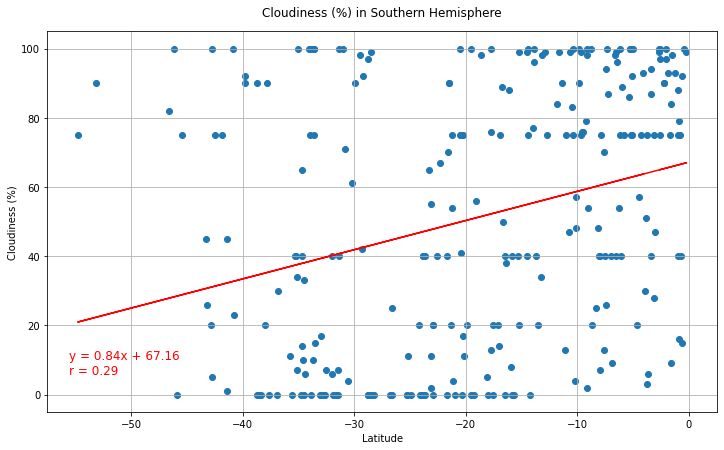

In [105]:
#southern cities cloud vs lat
makeregression(southerncities,'Lat', 'Cloudiness (%)','Southern Hemisphere')

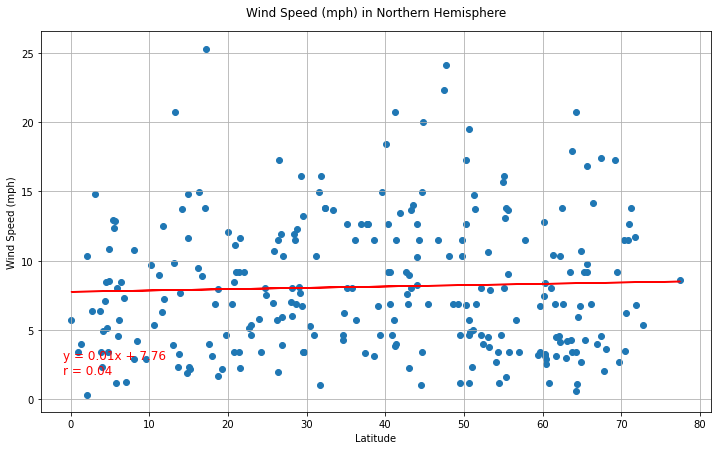

In [107]:
#northern cities wind vs lat
makeregression(northerncities,'Lat', 'Wind Speed (mph)','Northern Hemisphere')

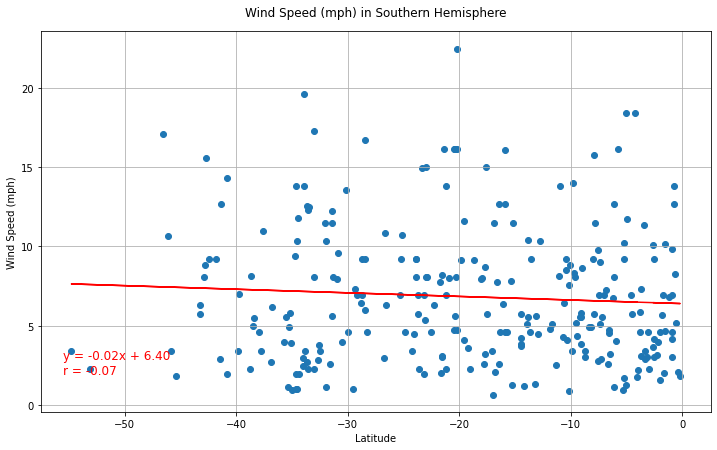

In [106]:
#southern cities wind vs lat
makeregression(southerncities,'Lat', 'Wind Speed (mph)','Southern Hemisphere')

## Data Observations
1. The maximum temperature peaks between Latitudes 0 and 22. The maximum temperature for the cities in the northern hemisphere had a greater range -2$^o$F to 103$^o$F, which are also the maximum and minimum of the whole data set. The minimum southern hemisphere temperature was 40$^o$F. The lower maximum temperature in the northern hemisphere is due to the tilt of the earth causing the northern hemisphere to be further away from the sun, there are more cities occupying latitudes (0 to 77.48) further away from the equator as there is a greater percentage land mass to occupy (40%). The southern hemisphere has a lower land mass to occupy (20%), and are closer to the equator i.e. between latitudes of 0 to -54.80. These difference would also cause the greater range of temperatures observed in the northern hemisphere. <br/>


2. There was a very strong negative correlation between the latitude and max temperature in northern hemisphere cities, r = -0.85. There was also a weaker positive correlation, r = 0.72, between the latitude and max temperature in southern hemisphere cities. This means maximum city temperatures decrease as they move further away from the equator. This is supported by the shape of total cities data in the observation above. This observation is due to the sun shining directly at the equator through the earths full orbit around the sun. <br/> 


3. There are minimal observable relationships between latitude and humidity, wind speed and cloudiness. There was also no strong correrlations in the northern and southern hemisphere data trends, no r was any higher than 0.3. This could either be due to these parameters having other factors of greater influence that temperature or that the data is based on a single time period and not an examination of several datasets over a year.

### ____ End Of Analysis ____